## **Homework 2** Problem 3

In this assignment, you will try to implement CycleGAN to do style transform. 

### (a) Installation

Install the CycleGAN package from the official GitHub repository.

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

Download the official zebra2horse dataset.

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

Specified [horse2zebra]
for details.

--2021-10-28 04:01:39--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/horse2zebra.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘./datasets/horse2zebra.zip’

./datasets/horse2ze 100%[===================>] 111.45M  2.95MB/s    in 43s     

2021-10-28 04:02:22 (2.59 MB/s) - ‘./datasets/horse2zebra.zip’ saved [116867962/116867962]

mkdir: cannot create directory ‘./datasets/horse2zebra/’: File exists
Archive:  ./datasets/horse2zebra.zip
replace ./datasets/horse2zebra/trainA/n02381460_6223.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/horse2zebra/trainA/n02381460_6223.jpg  
replace ./datasets/horse2zebra/trainA/n02381460_1567.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:

In [ ]:
import matplotlib.pyplot as plt

def display_grid(imgs, height, width):
  fig, axs = plt.subplots(height, width, figsize = (12, 12))
  plt.gray()

  # loop through subplots and add mnist images
  for i, ax in enumerate(axs.flat):
    img = plt.imread(imgs[i])
    ax.imshow(img)  

**Visualize Images**

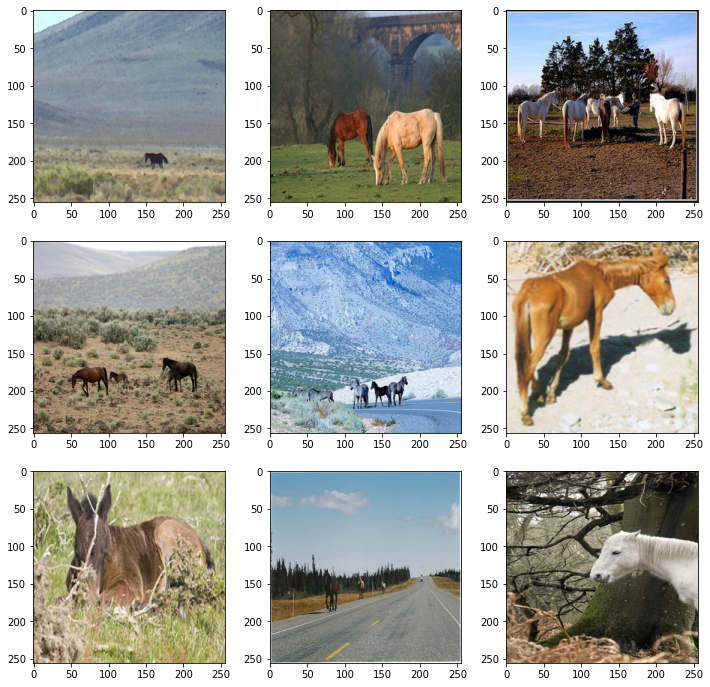

In [ ]:
real_horses_imgs = [
  './datasets/horse2zebra/trainA/n02381460_1567.jpg',
  './datasets/horse2zebra/trainA/n02381460_3354.jpg',
  './datasets/horse2zebra/trainA/n02381460_299.jpg',
  './datasets/horse2zebra/trainA/n02381460_3001.jpg',
  './datasets/horse2zebra/trainA/n02381460_4242.jpg',  
  './datasets/horse2zebra/trainA/n02381460_1666.jpg',
  './datasets/horse2zebra/trainA/n02381460_4396.jpg',
  './datasets/horse2zebra/trainA/n02381460_4502.jpg',
  './datasets/horse2zebra/trainA/n02381460_8527.jpg'
]

display_grid(real_horses_imgs, 3, 3)

### (b) Train CycleGAN

Train CycleGAN for about 5 epochs. Not necessary to finish training since it may cost a long time. Test your trained model and visualize some results.

Note: Use `latest_net_G_A.pth` if you want to transform images from class A to class B and `latest_net_G_B.pth` if you want to transform images from class B to class A.


In [ ]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/horse2zebra        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

Test Trained Model

In [ ]:
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

Visualize Test Images

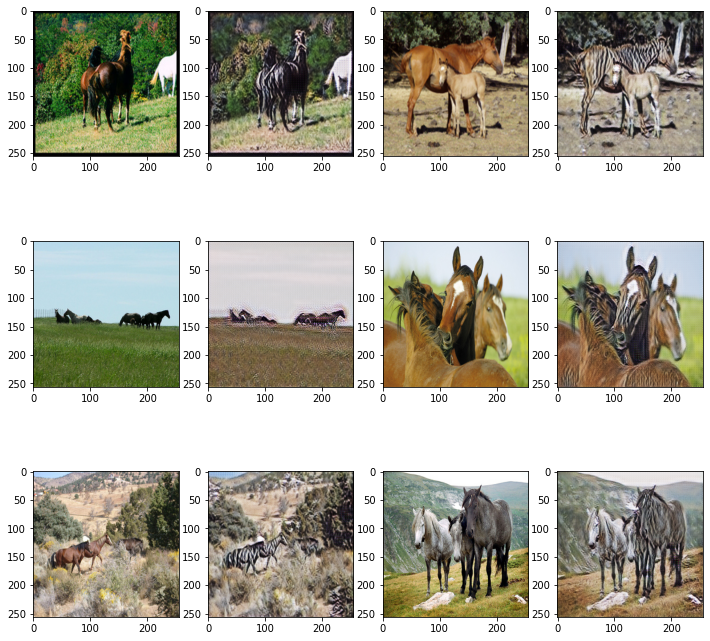

In [ ]:
horse_test_imgs = [
  './results/horse2zebra/test_latest/images/n02381460_1000_real.png',
  './results/horse2zebra/test_latest/images/n02381460_1000_fake.png',
  './results/horse2zebra/test_latest/images/n02381460_1620_real.png',
  './results/horse2zebra/test_latest/images/n02381460_1620_fake.png',
  './results/horse2zebra/test_latest/images/n02381460_2280_real.png',
  './results/horse2zebra/test_latest/images/n02381460_2280_fake.png',
  './results/horse2zebra/test_latest/images/n02381460_1010_real.png',
  './results/horse2zebra/test_latest/images/n02381460_1010_fake.png',
  './results/horse2zebra/test_latest/images/n02381460_1630_real.png',
  './results/horse2zebra/test_latest/images/n02381460_1630_fake.png',
  './results/horse2zebra/test_latest/images/n02381460_2460_real.png',
  './results/horse2zebra/test_latest/images/n02381460_2460_fake.png'                   
]

display_grid(horse_test_imgs, 3, 4)

### (c) Infer from Pre-trained Model

Download one of the official pretrained models.


In [ ]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra  # or zebra2horse

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2021-10-28 04:48:27--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’

./checkpoints/horse 100%[===================>]  43.46M  3.43MB/s    in 11s     

2021-10-28 04:48:38 (3.88 MB/s) - ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’ saved [45575747/45575747]



Or copy your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
cp ./checkpoints/horse2zebra_pretrained/latest_net_G_A.pth ./checkpoints/horse2zebra_pretrained/latest_net_G.pth

Test the style transform.

Note: Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.


In [ ]:
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

Visualize Results of Pre-Trained Model

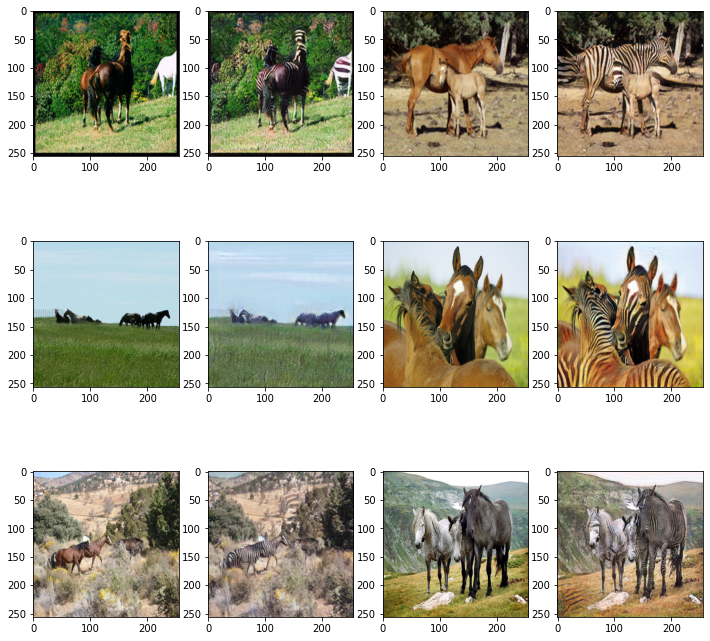

In [ ]:
real_fake_imgs = [           
  './results/horse2zebra_pretrained/test_latest/images/n02381460_1000_real.png',
  './results/horse2zebra_pretrained/test_latest/images/n02381460_1000_fake.png',
  './results/horse2zebra_pretrained/test_latest/images/n02381460_1620_real.png',
  './results/horse2zebra_pretrained/test_latest/images/n02381460_1620_fake.png',
  './results/horse2zebra_pretrained/test_latest/images/n02381460_2280_real.png',
  './results/horse2zebra_pretrained/test_latest/images/n02381460_2280_fake.png',
  './results/horse2zebra_pretrained/test_latest/images/n02381460_1010_real.png',
  './results/horse2zebra_pretrained/test_latest/images/n02381460_1010_fake.png',
  './results/horse2zebra_pretrained/test_latest/images/n02381460_1630_real.png',
  './results/horse2zebra_pretrained/test_latest/images/n02381460_1630_fake.png',
  './results/horse2zebra_pretrained/test_latest/images/n02381460_2460_real.png',
  './results/horse2zebra_pretrained/test_latest/images/n02381460_2460_fake.png'
]

display_grid(real_fake_imgs, 3, 4)

## **Discussion**

The results of the pre-trained model are certainly better in the cases above.They just look slightly more convincing. When the horses are in the distance the model trained on five epochs blurs the image much worse than the pretrained model.  Both networks struggle when horses overlap.

Try your customized images.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!mkdir ./datasets/horse2zebra/myTest
!cp -R /content/gdrive/My\ Drive/Colab\ Notebooks/ee-596/hw-2/horses/* ./datasets/horse2zebra/myTest/

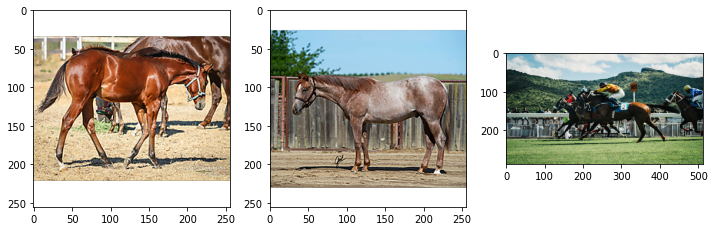

In [ ]:
custom_imgs = [           
  './datasets/horse2zebra/myTest/horse_1.png',
  './datasets/horse2zebra/myTest/horse_2.png',
  './datasets/horse2zebra/myTest/horse_5.png'
]

display_grid(custom_imgs, 1, 3)

In [ ]:
!python test.py --dataroot datasets/horse2zebra/myTest --name horse2zebra_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/myTest   	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

Visual Real & Fake Custom Images

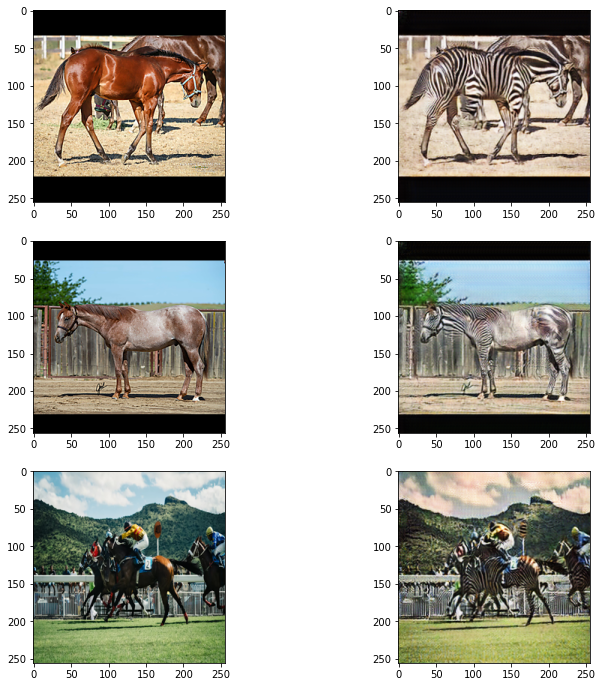

In [ ]:
real_fake_imgs = [           
  './results/horse2zebra_pretrained/test_latest/images/horse_1_real.png',
  './results/horse2zebra_pretrained/test_latest/images/horse_1_fake.png',
  './results/horse2zebra_pretrained/test_latest/images/horse_2_real.png',
  './results/horse2zebra_pretrained/test_latest/images/horse_2_fake.png',
  './results/horse2zebra_pretrained/test_latest/images/horse_5_real.png',
  './results/horse2zebra_pretrained/test_latest/images/horse_5_fake.png'
]

display_grid(real_fake_imgs, 3, 2)

### (d) Implement on Another Dataset

# Trying cityscapes_label2photo

Download

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh summer2winter_yosemite

Specified [summer2winter_yosemite]
for details.

--2021-10-28 05:37:25--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/summer2winter_yosemite.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132640856 (126M) [application/zip]
Saving to: ‘./datasets/summer2winter_yosemite.zip’

./datasets/summer2w 100%[===================>] 126.50M  1.67MB/s    in 70s     

2021-10-28 05:38:35 (1.82 MB/s) - ‘./datasets/summer2winter_yosemite.zip’ saved [132640856/132640856]

Archive:  ./datasets/summer2winter_yosemite.zip
   creating: ./datasets/summer2winter_yosemite/trainA/
  inflating: ./datasets/summer2winter_yosemite/trainA/2014-07-01 10:31:48.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2015-07-01 23:43:46.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2014-07-27 2

Visualize Images

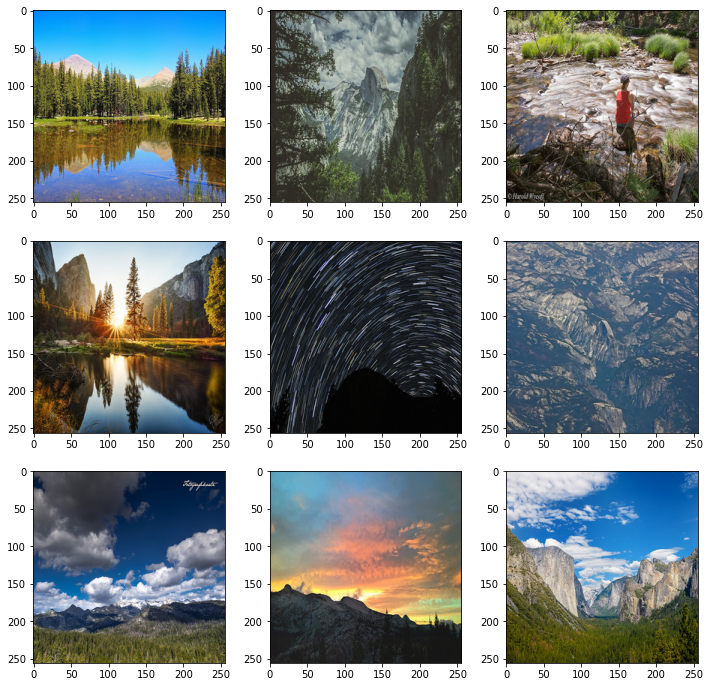

In [ ]:
yosemite_imgs = [
  './datasets/summer2winter_yosemite/trainA/2014-07-01 10:31:48.jpg',
  './datasets/summer2winter_yosemite/trainA/2015-07-01 23:43:46.jpg',
  './datasets/summer2winter_yosemite/trainA/2014-07-27 21:50:52.jpg',  
  './datasets/summer2winter_yosemite/trainA/2016-09-12 21:34:08.jpg',
  './datasets/summer2winter_yosemite/trainA/2015-06-10 23:35:46.jpg',
  './datasets/summer2winter_yosemite/trainA/2016-07-12 13:57:26.jpg',
  './datasets/summer2winter_yosemite/trainA/2014-05-13 02:35:47.jpg',
  './datasets/summer2winter_yosemite/trainA/2015-07-12 20:23:26.jpg',
  './datasets/summer2winter_yosemite/trainA/2015-08-26 00:23:12.jpg'
]

display_grid(yosemite_imgs, 3, 3)

Train Cycle-Gan

In [ ]:
!python train.py --dataroot ./datasets/summer2winter_yosemite/ --name summer2winter_yosemite --model cycle_gan

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/summer2winter_yosemite/	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
          

In [ ]:
cp ./checkpoints/summer2winter_yosemite/latest_net_G_A.pth ./checkpoints/summer2winter_yosemite/latest_net_G.pth

In [ ]:
!python test.py --dataroot datasets/summer2winter_yosemite/testA --name summer2winter_yosemite --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/summer2winter_yosemite/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                     

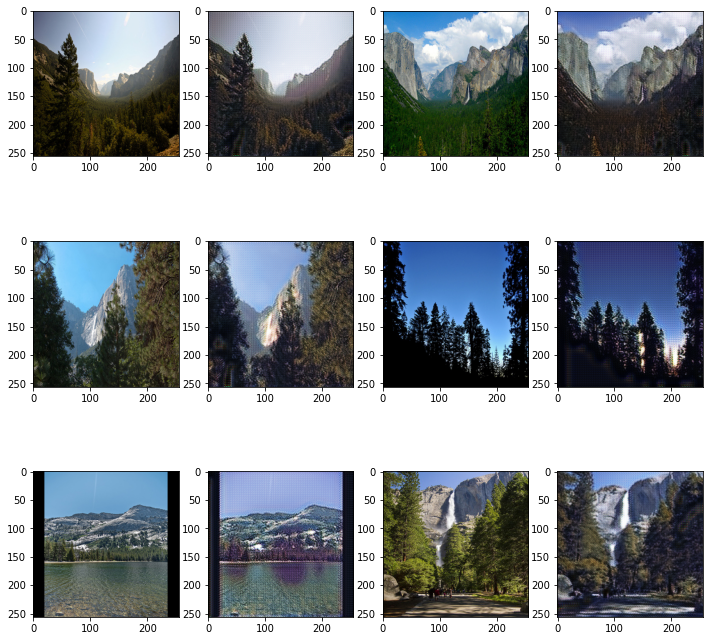

In [ ]:
yosemite_test_imgs = [
  './results/summer2winter_yosemite/test_latest/images/2010-09-07 12:23:20_real.png',
  './results/summer2winter_yosemite/test_latest/images/2010-09-07 12:23:20_fake.png',  
  './results/summer2winter_yosemite/test_latest/images/2011-07-06 16:55:20_real.png',
  './results/summer2winter_yosemite/test_latest/images/2011-07-06 16:55:20_fake.png',  
  './results/summer2winter_yosemite/test_latest/images/2011-08-16 09:43:51_real.png',  
  './results/summer2winter_yosemite/test_latest/images/2011-08-16 09:43:51_fake.png', 
  './results/summer2winter_yosemite/test_latest/images/2011-07-08 15:49:30_real.png',
  './results/summer2winter_yosemite/test_latest/images/2011-07-08 15:49:30_fake.png', 
  './results/summer2winter_yosemite/test_latest/images/2011-07-22 18:53:10_real.png',
  './results/summer2winter_yosemite/test_latest/images/2011-07-22 18:53:10_fake.png',
  './results/summer2winter_yosemite/test_latest/images/2011-07-03 11:01:20_real.png',
  './results/summer2winter_yosemite/test_latest/images/2011-07-03 11:01:20_fake.png'                    
]

display_grid(yosemite_test_imgs, 3, 4)

Use Pre-Trained

In [ ]:
!bash ./scripts/download_cyclegan_model.sh summer2winter_yosemite 

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [summer2winter_yosemite]
for details.

--2021-10-28 06:23:21--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/summer2winter_yosemite.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/summer2winter_yosemite_pretrained/latest_net_G.pth’

./checkpoints/summe 100%[===================>]  43.46M  1.88MB/s    in 22s     

2021-10-28 06:23:43 (1.98 MB/s) - ‘./checkpoints/summer2winter_yosemite_pretrained/latest_

In [ ]:
!python test.py --dataroot datasets/summer2winter_yosemite/testA --name summer2winter_yosemite_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/summer2winter_yosemite/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                     

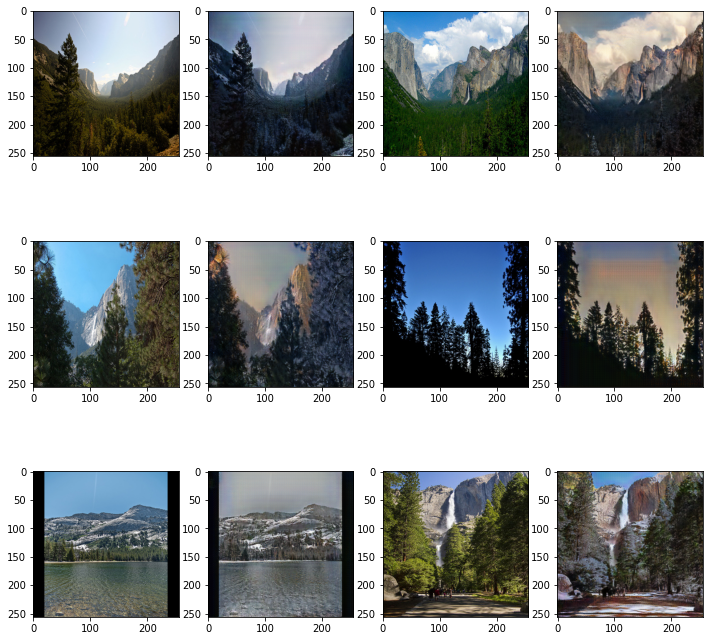

In [ ]:
yosemite_pretrained_imgs = [
  './results/summer2winter_yosemite_pretrained/test_latest/images/2010-09-07 12:23:20_real.png',
  './results/summer2winter_yosemite_pretrained/test_latest/images/2010-09-07 12:23:20_fake.png',  
  './results/summer2winter_yosemite_pretrained/test_latest/images/2011-07-06 16:55:20_real.png',
  './results/summer2winter_yosemite_pretrained/test_latest/images/2011-07-06 16:55:20_fake.png',  
  './results/summer2winter_yosemite_pretrained/test_latest/images/2011-08-16 09:43:51_real.png',  
  './results/summer2winter_yosemite_pretrained/test_latest/images/2011-08-16 09:43:51_fake.png', 
  './results/summer2winter_yosemite_pretrained/test_latest/images/2011-07-08 15:49:30_real.png',
  './results/summer2winter_yosemite_pretrained/test_latest/images/2011-07-08 15:49:30_fake.png', 
  './results/summer2winter_yosemite_pretrained/test_latest/images/2011-07-22 18:53:10_real.png',
  './results/summer2winter_yosemite_pretrained/test_latest/images/2011-07-22 18:53:10_fake.png',
  './results/summer2winter_yosemite_pretrained/test_latest/images/2011-07-03 11:01:20_real.png',
  './results/summer2winter_yosemite_pretrained/test_latest/images/2011-07-03 11:01:20_fake.png'                    
]

display_grid(yosemite_pretrained_imgs, 3, 4)

# Trying monet2photo

Download

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh monet2photo

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/monet2photo/trainB/2016-03-31 05:58:36.jpg  
  inflating: ./datasets/monet2photo/trainB/2014-01-10 12:46:39.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-02-23 11:45:00.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-05-23 09:38:08.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-01-15 00:48:49.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-12-27 18:15:26.jpg  
  inflating: ./datasets/monet2photo/trainB/2017-01-02 11:16:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-06 11:08:32.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-12-16 07:43:36.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-03-25 12:57:28.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-05-10 11:44:44.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-03-11 08:01:52.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-30 05:26:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-10-0

Visualize Images

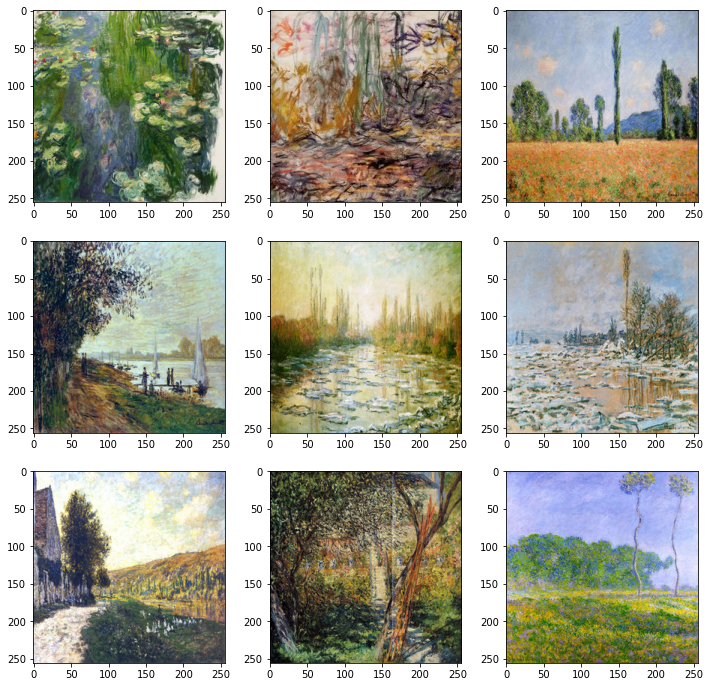

In [ ]:
monet_imgs = [
  './datasets/monet2photo/testA/01210.jpg',
  './datasets/monet2photo/testA/01220.jpg',
  './datasets/monet2photo/testA/00500.jpg',
  './datasets/monet2photo/testA/00920.jpg',
  './datasets/monet2photo/testA/00820.jpg',
  './datasets/monet2photo/testA/00090.jpg', 
  './datasets/monet2photo/testA/00710.jpg',
  './datasets/monet2photo/testA/00240.jpg',
  './datasets/monet2photo/testA/00650.jpg'
]

display_grid(monet_imgs, 3, 3)

Train Cycle-Gan

In [ ]:
!python train.py --dataroot ./datasets/monet2photo --name monet2photo --model cycle_gan

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/monet2photo        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

In [ ]:
cp ./checkpoints/monet2photo/latest_net_G_A.pth ./checkpoints/monet2photo/latest_net_G.pth

In [ ]:
!python test.py --dataroot datasets/monet2photo/testA --name monet2photo --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/monet2photo/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

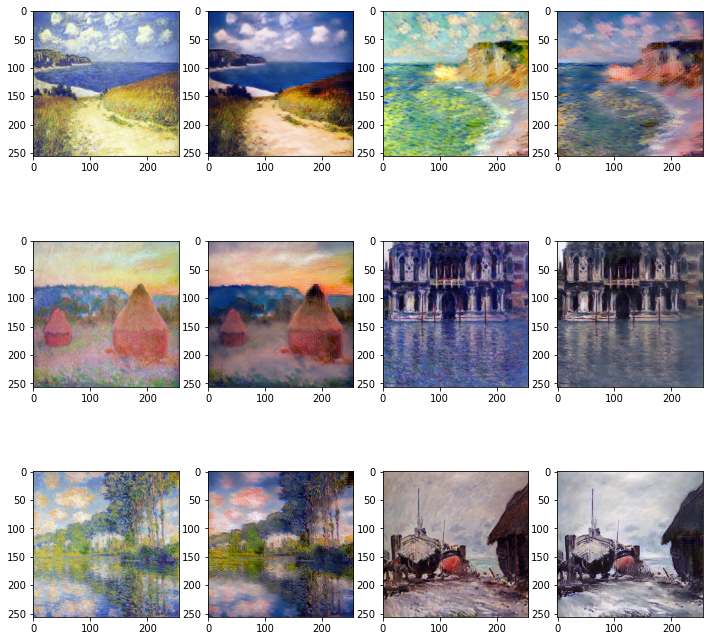

In [ ]:
monet2photo_test_imgs = [
  './results/monet2photo/test_latest/images/00010_real.png',
  './results/monet2photo/test_latest/images/00010_fake.png',  
  './results/monet2photo/test_latest/images/00160_real.png',
  './results/monet2photo/test_latest/images/00160_fake.png',  
  './results/monet2photo/test_latest/images/00270_real.png',  
  './results/monet2photo/test_latest/images/00270_fake.png', 
  './results/monet2photo/test_latest/images/00440_real.png',
  './results/monet2photo/test_latest/images/00440_fake.png', 
  './results/monet2photo/test_latest/images/00490_real.png',
  './results/monet2photo/test_latest/images/00490_fake.png',
  './results/monet2photo/test_latest/images/00210_real.png',
  './results/monet2photo/test_latest/images/00210_fake.png'                    
]

display_grid(monet2photo_test_imgs, 3, 4)

Use Pre-Trained

In [ ]:
!bash ./scripts/download_cyclegan_model.sh monet2photo  # or zebra2horse

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [monet2photo]
for details.

--2021-10-28 08:43:25--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/monet2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’

./checkpoints/monet 100%[===================>]  43.46M  4.49MB/s    in 10s     

2021-10-28 08:43:35 (4.25 MB/s) - ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’ saved [45575747/45575747]



In [ ]:
!python test.py --dataroot datasets/monet2photo/testA --name monet2photo_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/monet2photo/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

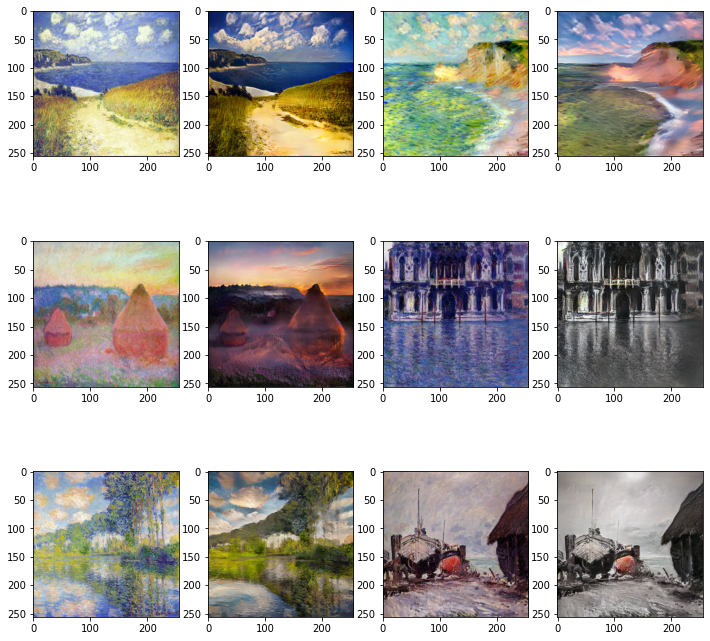

In [ ]:
monet2photo_pretrained_imgs = [
  './results/monet2photo_pretrained/test_latest/images/00010_real.png',
  './results/monet2photo_pretrained/test_latest/images/00010_fake.png',  
  './results/monet2photo_pretrained/test_latest/images/00160_real.png',
  './results/monet2photo_pretrained/test_latest/images/00160_fake.png',  
  './results/monet2photo_pretrained/test_latest/images/00270_real.png',  
  './results/monet2photo_pretrained/test_latest/images/00270_fake.png', 
  './results/monet2photo_pretrained/test_latest/images/00440_real.png',
  './results/monet2photo_pretrained/test_latest/images/00440_fake.png', 
  './results/monet2photo_pretrained/test_latest/images/00490_real.png',
  './results/monet2photo_pretrained/test_latest/images/00490_fake.png',
  './results/monet2photo_pretrained/test_latest/images/00210_real.png',
  './results/monet2photo_pretrained/test_latest/images/00210_fake.png'                         
]

display_grid(monet2photo_pretrained_imgs, 3, 4)